In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

clustering is the task of partitioning the dataset into groups, called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to.

## k-Means Clustering

k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes

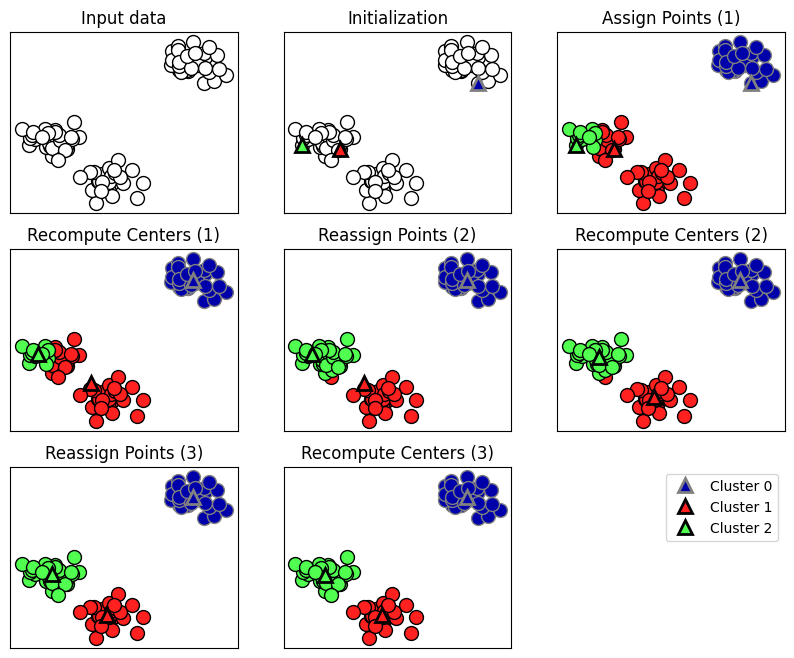

In [2]:
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors indicate cluster membership. We specified that we are looking for three clusters, so the algorithm was initialized by declaring three data points randomly as cluster centers (see “Initialization”). Then the iterative algorithm starts. First, each data point is assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster centers are updated to be the mean of the assigned points (see “Recompute Centers (1)”). Then the process is repeated two more times. After the third iteration, the assignment of points to cluster centers remained unchanged, so the algorithm stops.

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y=make_blobs(random_state=1)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
print("Cluster memberships: \n{}".format(kmeans.labels_))

Cluster memberships: 
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [6]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [7]:
print(kmeans.cluster_centers_)

[[ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]
 [-10.04935243  -3.85954095]]


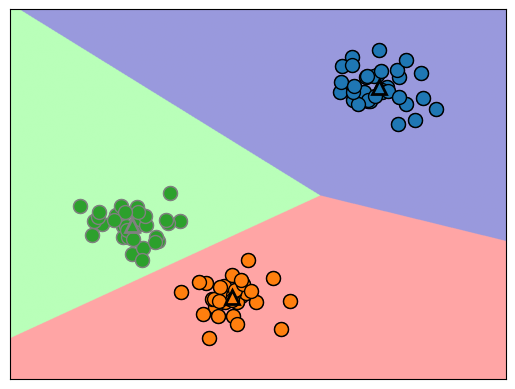

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

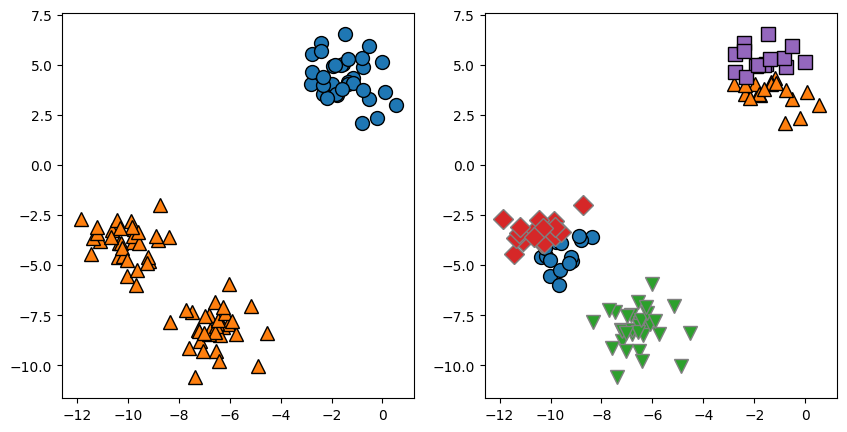

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

## Agglomerative Clustering

Agglomerative clustering refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in scikit-learn is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the “most similar cluster” is measured. This measure is always defined between two existing clusters.

The following three choices are implemented in scikit-learn:

ward
The default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.

average
average linkage merges the two clusters that have the smallest average distance between all their points.

complete
complete linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

ward works on most datasets, and we will use it in our examples. If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), average or complete might work better.

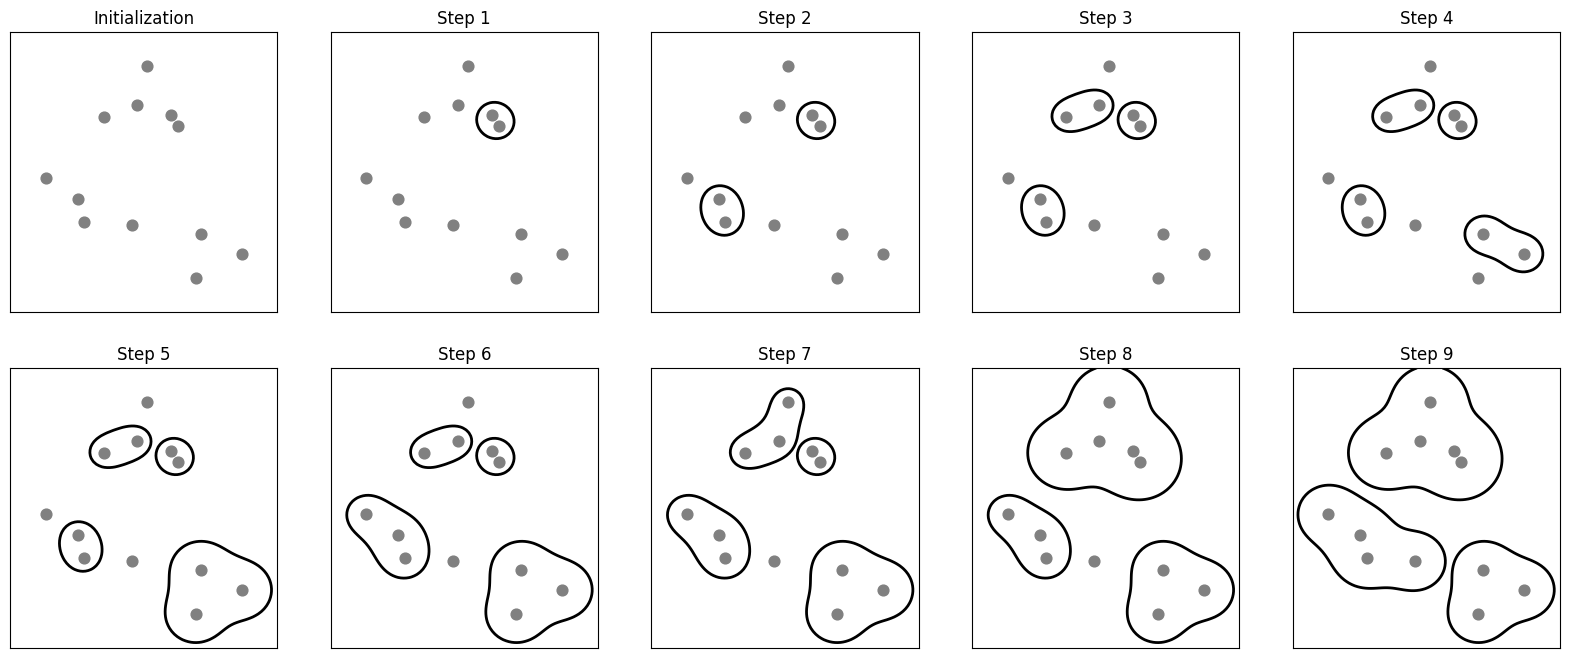

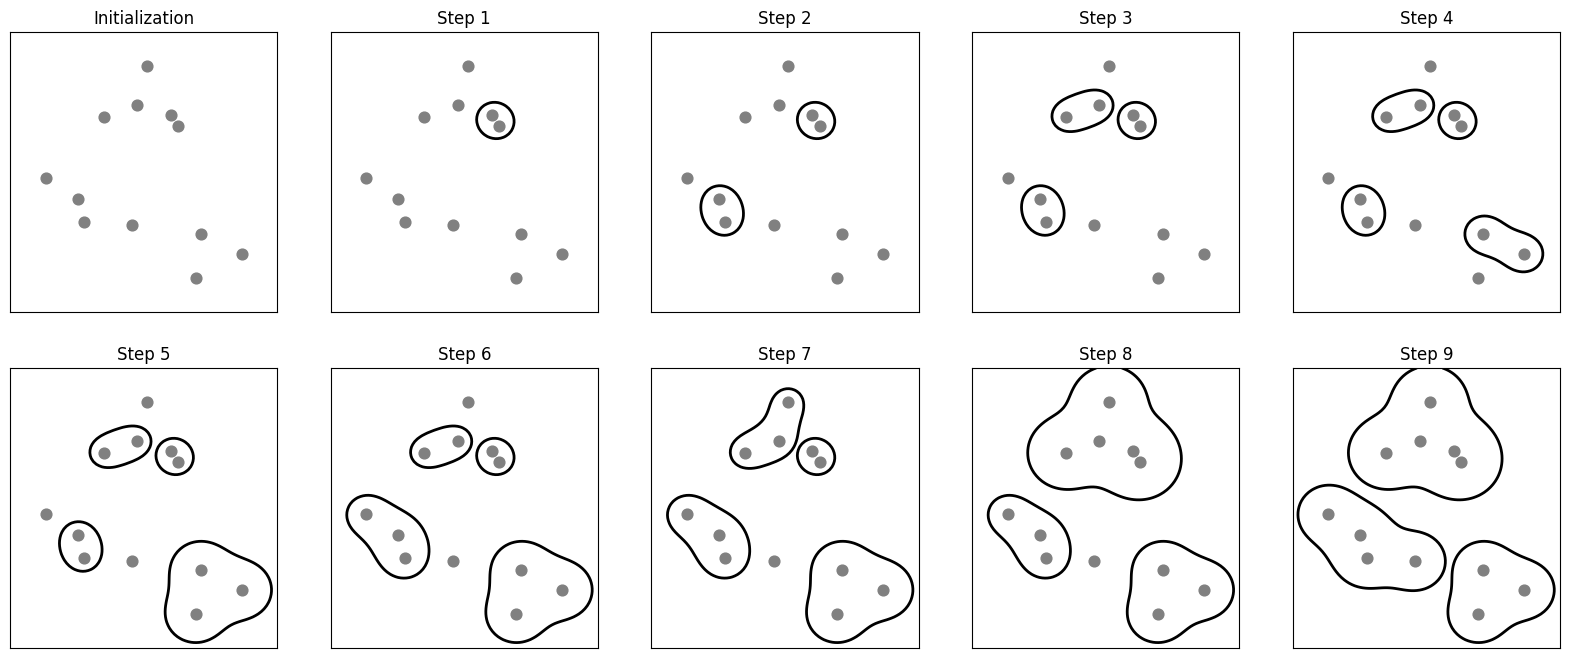

In [11]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

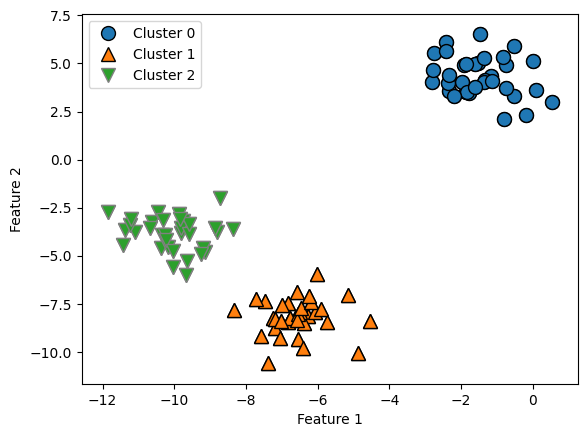

In [13]:
from sklearn.cluster import AgglomerativeClustering

X,y=make_blobs(random_state=1)

agg=AgglomerativeClustering(n_clusters=3)
assignment=agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["Cluster 0","Cluster 1","Cluster 2"],loc="best")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## DBSCAN

In [16]:
from sklearn.cluster import DBSCAN
X,y=make_blobs(random_state=0,n_samples=12)
dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)
print("Cluster memberships: \n{}".format(clusters))

Cluster memberships: 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


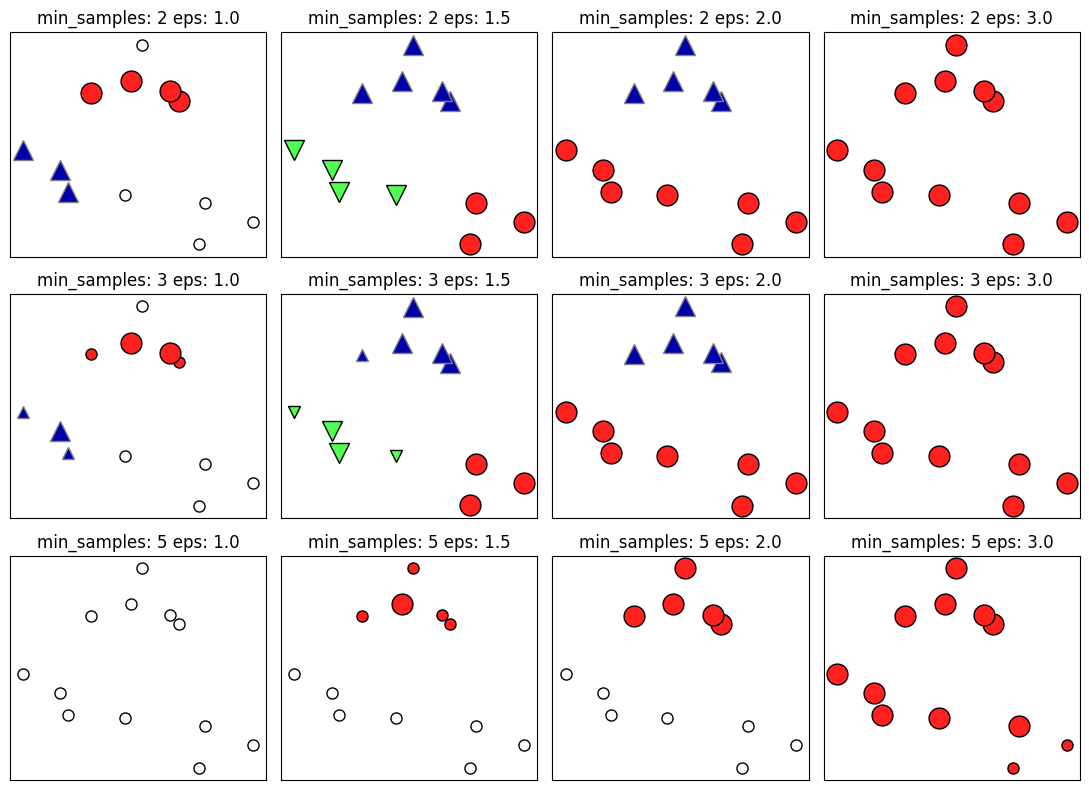

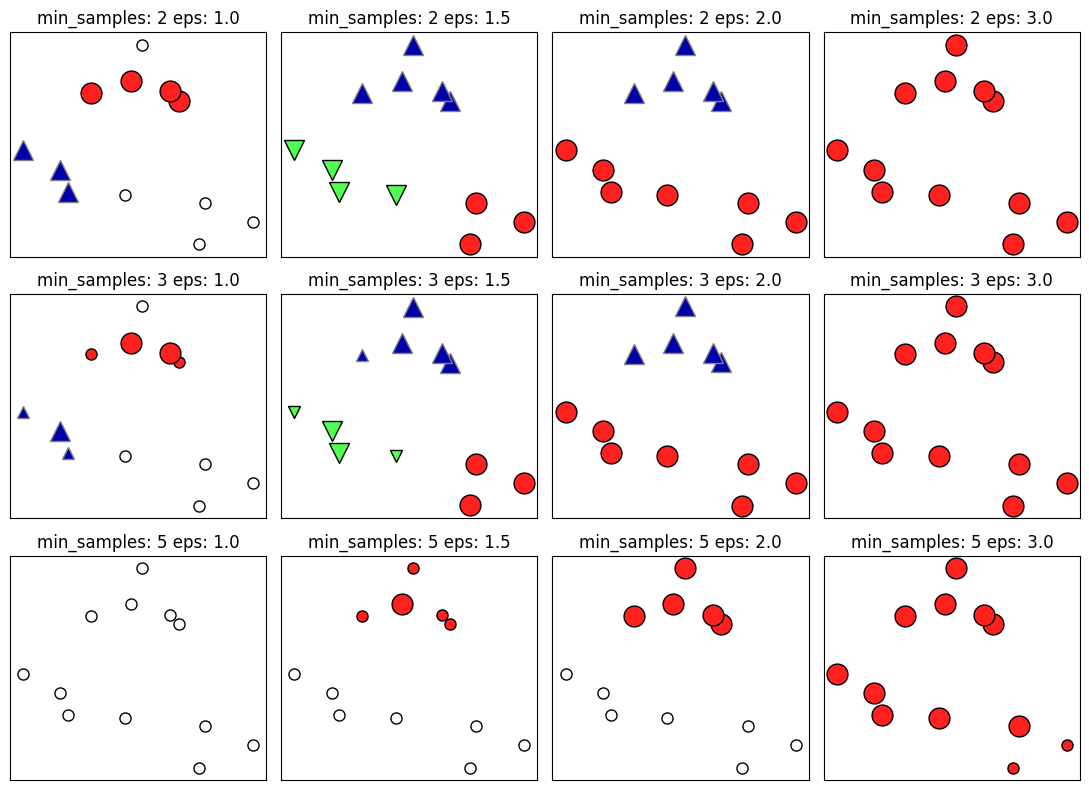

In [18]:
mglearn.plots.plot_dbscan()
plt.show()

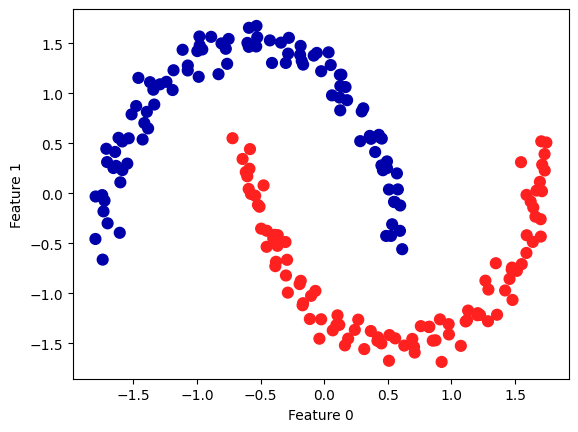

In [27]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
